In [17]:
using Astrodynamics
using DerIMDEX
using ODE
using jspice
using PyPlot

In [18]:
jsinit()

In [19]:
mu=planets["earth"]["mu"]
RE=planets["earth"]["re"]
hp=185
inc=28.5*pi/180
e=0.975000919
node=86.83224*pi/180
argp=-129.98616*pi/180
jd0=2458119.33552
dt=5.23359
rp=hp+RE
a=rp/(1-e)

262535.1027903782

In [20]:
el=[a;e;inc;node;argp;0]
x0=cartesian(el,mu)

6-element Array{Float64,1}:
  4179.47   
 -4455.25   
 -2399.48   
     6.63923
     8.03688
    -3.35817

In [21]:
gregorian(jd0,"jd")

(2017,12,31,20,3,8.928017020225525)

In [22]:
et0=(jd0-julian(2000,1,1,12,0,0,"jd"))*86400;
et1=et0+dt*86400;

In [23]:
traj=ode45(der,x0,[et0;et1]);
n=length(traj[1]);
x=[traj[2][j][1] for j=1:n];
y=[traj[2][j][2] for j=1:n];
z=[traj[2][j][3] for j=1:n];

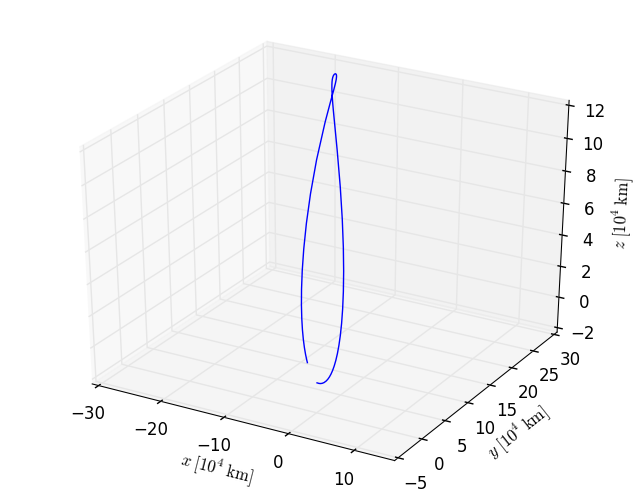

In [24]:
frlin=plot3D(x/1e4,y/1e4,z/1e4);
axis("equal");
xlabel("\$x\\ [10^4 {\\rm km}]\$");
ylabel("\$y\\ [10^4 {\\rm km}]\$");
zlabel("\$z\\ [10^4 {\\rm km}]\$");
grid(true);